In [89]:
import os
import torch
import torchvision
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
from collections import OrderedDict
import datetime

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# workdir = '/Users/erichansen/Desktop/Classes/9.520/project/'
workdir = './'

# Read Inputs

In [3]:
def add_effective_epoch(df):
#     print(df.columns)
    df['effective_epoch'] = (df['round']) * df['max_epochs'] + df['epoch']
    if 'layer' in df.columns:
        df['layer_effective_epoch'] = (df['round'] * 3 * df['max_epochs']) + (df['layer'] * df['max_epochs']) + df['epoch']
    else:
        df['layer_effective_epoch'] = df['effective_epoch']
    
    return df

In [4]:
def read_results_df(filename):
    return add_effective_epoch(pd.read_csv(workdir + f'results/{filename}.csv'))

In [5]:
# filename = '2022-12-11-08-44_CNN_layerwise.csv'
# filename2 = '2022-12-11-09-03_CNN_backprop.csv'

In [42]:
CNN_layerwise_64_MNIST_exp1

,Unnamed: 0,type,epoch,top1,top5,loss,time,layer,round,trainable_params,...,weight_decay,learning_rate,invariant,condition,max_epochs,model,train_strategy,model_strategy,effective_epoch,layer_effective_epoch
0,0,train,0,0.505767,0.886267,0.006601,4.2,0,0,642,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,0,0
1,1,test,0,0.520400,0.894800,0.006519,NaN,0,0,642,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,0,0
2,2,train,1,0.612550,0.935367,0.005154,4.2,0,0,642,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,1,1
3,3,test,1,0.628900,0.941900,0.005043,NaN,0,0,642,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,1,1
4,4,train,2,0.673367,0.953383,0.004360,4.3,0,0,642,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,5,test,2,0.827200,0.986800,0.002229,NaN,2,19,36928,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,97,297
596,6,train,3,0.819617,0.984350,0.002352,4.2,2,19,36928,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,98,298
597,7,test,3,0.826900,0.986700,0.002231,NaN,2,19,36928,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,98,298
598,8,train,4,0.819217,0.984350,0.002354,4.3,2,19,36928,...,0.01,0.001,False,exp1_rounds20_epochs5_MNIST,5,CNN,layerwise,CNN_layerwise,99,299


## Network DFs

In [70]:
MLP_layerwise_128_MNIST_norm = read_results_df('2022-12-12-06-16_MLP_layerwise')
MLP_backprop_128_MNIST_norm = read_results_df('2022-12-12-06-18_MLP_backprop')
CNN_layerwise_64_MNIST_norm = read_results_df('2022-12-12-06-25_CNN_layerwise')
CNN_backprop_64_MNIST_norm = read_results_df('2022-12-12-06-32_CNN_backprop')

## Experiment DFs

In [92]:
# CNN ===

# Experiment 1 - CIFAR 10
# - 

# Experiment 1 - MNIST
CNN_layerwise_64_MNIST_exp1 = read_results_df('2022-12-11-12-19_CNN_layerwise')
CNN_backprop_64_MNIST = read_results_df('2022-12-11-12-35_CNN_backprop')

# Experiment 2 - CIFAR 10
# - 

# Experiment 2 - MNIST
CNN_layerwise_16_MNIST_exp2 = read_results_df('2022-12-11-08-44_CNN_layerwise')
CNN_layerwise_64_MNIST_exp2 = read_results_df('2022-12-11-19-17_CNN_layerwise')
CNN_backprop_16_MNIST = read_results_df('2022-12-11-09-03_CNN_backprop')
CNN_backprop_64_MNIST_expanded = read_results_df('2022-12-11-23-13_CNN_backprop')

## MLP ===
    
# Experiment 1 - CIFAR 10 - 512
MLP_layerwise_512_CIFAR10_exp1 = read_results_df('2022-12-10-18-02_MLP_layerwise')
MLP_backprop_512_CIFAR10 = read_results_df('2022-12-10-02-21_MLP_backprop')

# - '2022-12-10-18-02_MLP_layerwise'
# - '2022-12-10-02-21_MLP_backprop'

# Experiment 1 - MNIST - 512
MLP_layerwise_512_MNIST_exp1 = read_results_df('2022-12-11-03-04_MLP_layerwise')
MLP_backprop_512_MNIST = read_results_df('2022-12-11-03-19_MLP_backprop')
    
# Experiment 1 - MNIST - 128
MLP_layerwise_128_MNIST_exp1 = read_results_df('2022-12-11-06-30_MLP_layerwise')

# Experiment 2 - CIFAR 10 - 512
MLP_layerwise_512_CIFAR10_exp2 = read_results_df('2022-12-10-22-30_MLP_layerwise')

# Experiment 2 - MNIST - 512
MLP_layerwise_512_MNIST_exp2 = read_results_df('2022-12-10-22-30_MLP_layerwise')
    
# Experiment 2 - MNIST - 128
MLP_layerwise_128_MNIST_exp2 = read_results_df('2022-12-11-04-13_MLP_layerwise')
MLP_backprop_128_MNIST = read_results_df('2022-12-11-04-41_MLP_backprop')


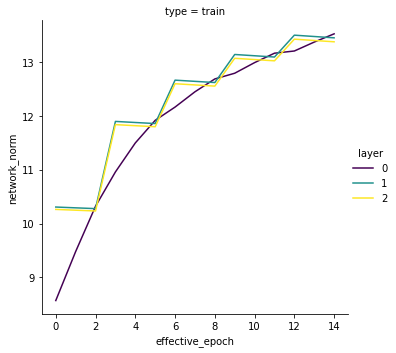

In [84]:
plot_cross_layer_results(CNN_layerwise_64_MNIST_norm[CNN_layerwise_64_MNIST_norm['type'] == 'train'], y='network_norm', 
                         filename='CNN_layerwise_64_MNIST_crosslayer_norm')

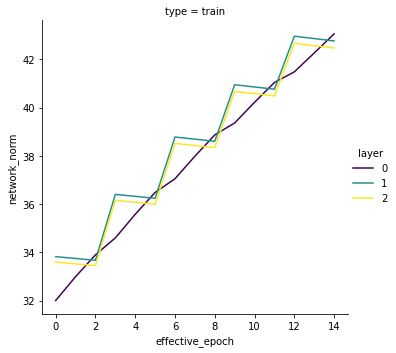

In [83]:
plot_cross_layer_results(MLP_layerwise_128_MNIST_norm[MLP_layerwise_128_MNIST_norm['type'] == 'train'], y='network_norm', 
                         filename='MLP_layerwise_128_MNIST_crosslayer_norm')

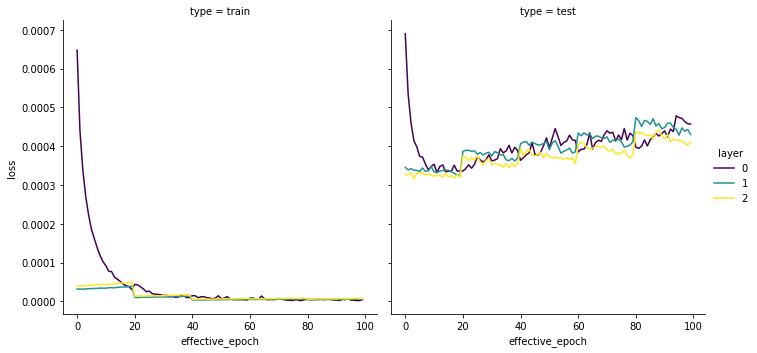

In [67]:
plot_cross_layer_results(MLP_layerwise_128_MNIST_exp2, y='loss', filename='MLP_layerwise_128_MNIST_exp2_crosslayer_loss')

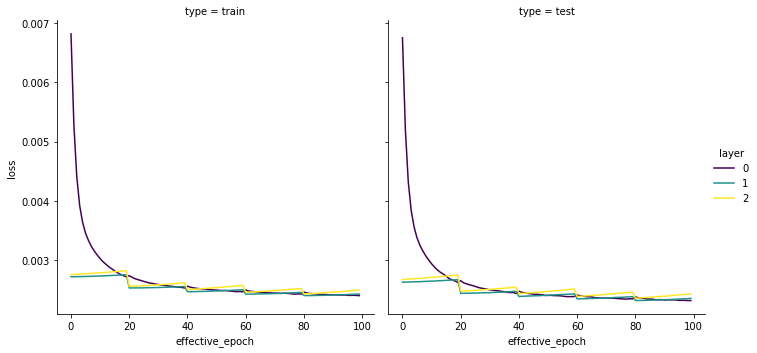

In [64]:
plot_cross_layer_results(CNN_layerwise_64_MNIST_exp2, y='loss', filename='CNN_layerwise_64_MNIST_exp1_crosslayer_top1')

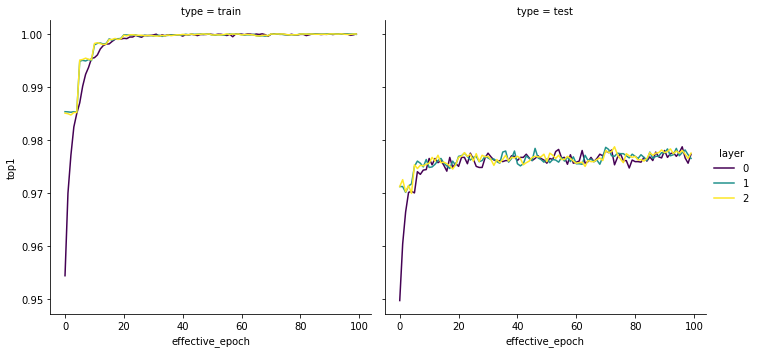

In [50]:
plot_cross_layer_results(MLP_layerwise_128_MNIST_exp1, y='top1', filename='MLP_layerwise_128_MNIST_exp1_crosslayer_top1')

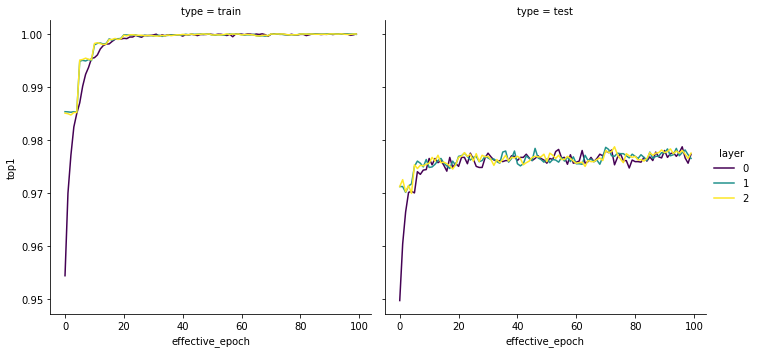

In [28]:
plot_cross_layer_results(MLP_layerwise_128_MNIST_exp1, y='top1')

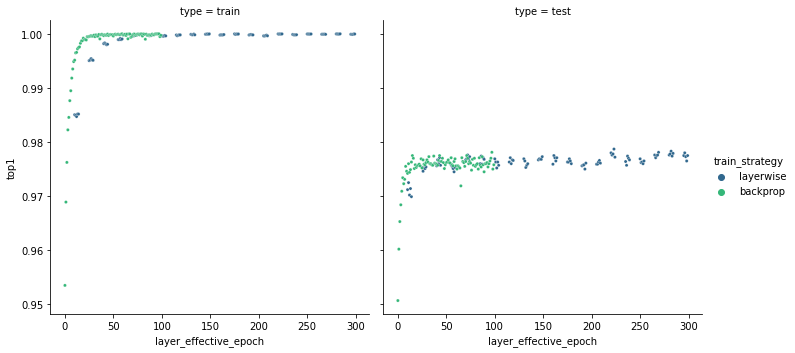

In [95]:
plot_compare_layerwise_backprop_dfs(MLP_layerwise_128_MNIST_exp1, MLP_backprop_128_MNIST, x='layer_effective_epoch', layer=2, y='top1')

In [ ]:
CNN_backprop_64_MNIST_expanded

In [87]:
def plot_cross_layer_results(layer_df, x='effective_epoch', y='loss', col='type', filename='temp'):
    
    rel_plot = sns.relplot(
        data=layer_df,
        x=x,
        y=y,
        hue='layer',
        col=col,
        kind='line',
        palette='viridis'
    )
    
    fig = rel_plot.fig
    fig.savefig(workdir + 'plots/' + filename + '.png') 

In [23]:
def plot_layerwise_experiment_dfs(layer_df1, layer_df2, layer=0, x='effective_epoch', y='loss', filename='temp'):
    layerwise_df = pd.concat([layer_df1[layer_df1['layer'] == layer], layer_df2[layer_df2['layer'] == layer]])
    
    rel_plot = sns.relplot(
        data=layerwise_df,
        x=x,
        y=y,
        hue='condition',
        col='type',
        s=30,
        palette='viridis'
    )
    
    fig = rel_plot.fig
    fig.savefig(workdir + 'plots/' + filename + '.png') 

In [24]:
def plot_compare_layerwise_backprop_dfs(layer_df, backprop_df, layer=0, x='effective_epoch', y='loss', filename='temp'):
    compare_bp_df = pd.concat([layer_df[layer_df['layer'] == layer], backprop_df])
    
    rel_plot = sns.relplot(
        data=compare_bp_df,
        x=x,
        y=y,
        hue='train_strategy',
        col='type',
        s=10,
        palette='viridis'
    )
    
    fig = rel_plot.fig
    fig.savefig(workdir + 'plots/' + filename + '.png') 

## Old Analysis Functions

In [ ]:
cnn_c1_layerwise_df = read_results_df('2022-12-11-12-19_CNN_layerwise')
cnn_c1_backprop_df = read_results_df('2022-12-11-23-13_CNN_backprop')
cnn_c2_layerwise_df = read_results_df('2022-12-11-19-17_CNN_layerwise')


In [22]:
mlp_c1_layerwise_df = read_results_df('2022-12-11-03-04_MLP_layerwise')
mlp_c2_layerwise_df = read_results_df('2022-12-11-04-30_MLP_layerwise')
mlp_c1_backprop_df = read_results_df('2022-12-11-03-19_MLP_backprop')

## Plot Type 1: Accuracy/Loss over Effective Epochs by Experimenal Conditions

In [31]:
def compare_layer_improvement(df):
    df = df[df['epoch'] == df['epoch'].max()]
    
    df = df.sort_values(by=['round', 'layer'])
    
    type_df = df.groupby(by='type')
    df['layer_top1_imp'] = type_df['top1'].diff()
    df['layer_loss_imp'] = type_df['loss'].diff()
    
    sns.relplot(
        data=df,
        x='round',
        y='layer_top1_imp',
        col='type',
        hue='layer',
        palette='viridis',
        kind='line'
    )
    
    sns.relplot(
        data=df,
        x='round',
        y='layer_loss_imp',
        col='type',
        hue='layer',
        palette='viridis',
        kind='line'
    )
    
    return df

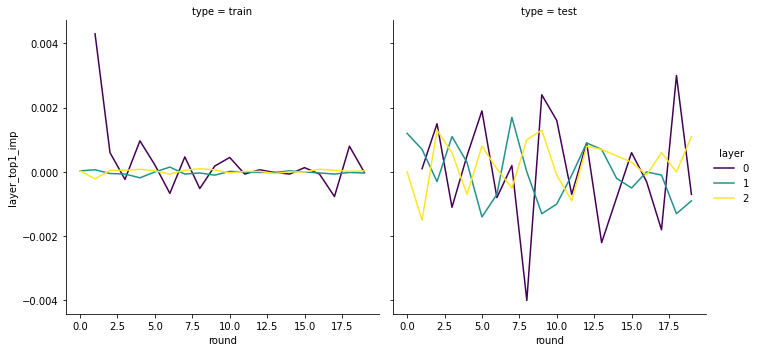

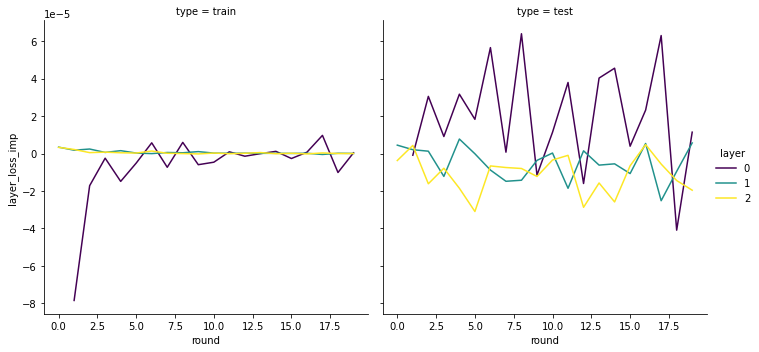

In [34]:
df = compare_layer_improvement(mlp_c2_layerwise_df)